In [1]:
import pandas as pd
import numpy as np
from operator import concat
from os import replace
#para graficos Estaticos
import seaborn as sns
import matplotlib.pyplot as plt

# Para graficos interactivos
from turtle import color
import plotly.graph_objects as go
import plotly.express as px

    #para generar un dash a partir de linteractivo
import dash
from dash import html
from dash import dcc

# Pruebas de  funciones de autocorrelación ACF & PACF 
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf

#Dickey-Fuller
from statsmodels.tsa.stattools import adfuller
#plt.figure(figsize=(15, 20),)

C:\Users\miavila\AppData\Roaming\Python\Python39\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# LOAD total agru_hour


In [2]:
kernel='C:/Users/miavila/Documents/U/PROYECTO P/basef/'
df=pd.read_excel(kernel + '4.total agru_hour.xlsx')
#UPN=UPN.sort_values(by='FechaT') #ascending=False 
#UPN.index = range(UPN.shape[0])c
DF=df
df


,Unnamed: 0,FechaT,Fecha,Operación_N,sumRecibidas,festivo,festividades,Dia_SemN,Dia_MesN,MesN,Hora24,Jornada5,Jornada6
0,0,2022-01-01 00:00:00,2022-01-01,Biometria,0,1,0,6,1,1,0,1,1
1,1,2022-01-01 00:00:00,2022-01-01,CAV,0,1,0,6,1,1,0,1,1
2,2,2022-01-01 00:00:00,2022-01-01,Conservacion,0,1,0,6,1,1,0,1,1
3,3,2022-01-01 00:00:00,2022-01-01,Ejecutivo Premium,0,1,0,6,1,1,0,1,1
4,4,2022-01-01 00:00:00,2022-01-01,Especializados Bloqueos,0,1,0,6,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69978,69978,2022-08-31 23:00:00,2022-08-31,Orquestador,0,0,0,3,31,8,23,5,1
69979,69979,2022-08-31 23:00:00,2022-08-31,Pensilvania,0,0,0,3,31,8,23,5,1
69980,69980,2022-08-31 23:00:00,2022-08-31,Persona Juridica - Home,4,0,0,3,31,8,23,5,1
69981,69981,2022-08-31 23:00:00,2022-08-31,U_Persona_Natural,81,0,0,3,31,8,23,5,1


In [3]:
df=pd.DataFrame(df,columns=['FechaT', 'Fecha', 'Operación_N', 'sumRecibidas', 'festivo','festividades',
       'MesN', 'Dia_MesN', 'Dia_SemN', 'Hora24'])
       
UPN=df[df['Operación_N']=='U_Persona_Natural']
UPN=UPN.sort_values(by='FechaT') #ascending=False 
UPN.index = range(UPN.shape[0])
P=df[df['Operación_N']=='Pensilvania']
BIO=df[df['Operación_N']=='Biometria']
CON=df[df['Operación_N']=='Conservacion']
EP=df[df['Operación_N']=='Ejecutivo Premium']
EB=df[df['Operación_N']=='Especializados Bloqueos']
EBF=df[df['Operación_N']=='Especializados Bloqueos F']
ME=df[df['Operación_N']=='Moneda Extranjera - Home']
OR=df[df['Operación_N']=='Orquestador']
PJH=df[df['Operación_N']=='Persona Juridica - Home']
CAV=df[df['Operación_N']=='CAV']
VIP=df[df['Operación_N']=='VIP PJ']

In [4]:

df['Operación_N'].replace(['Pensilvania'],['U_Persona_Natural'],inplace=True)   

agru = df.groupby(['FechaT', 'Fecha', 'Operación_N', 'festivo','festividades',
       'MesN', 'Dia_MesN', 'Dia_SemN', 'Hora24'],dropna=False,as_index=False)['sumRecibidas'].sum()  

df=pd.DataFrame(agru,columns=['FechaT', 'Fecha', 'Operación_N', 'sumRecibidas', 'festivo','festividades',
       'MesN', 'Dia_MesN', 'Dia_SemN', 'Hora24'])
UPN=df[df['Operación_N']=='U_Persona_Natural']

UPN=UPN.sort_values(by='FechaT') #ascending=False 
UPN.index = range(UPN.shape[0])

In [5]:
from turtle import color
import plotly.graph_objects as go
import plotly.express as px
# Create figure
    # ORDENA POR FECHA
        #P=P.sort_values(by='FechaT') # PENSILVANIA
        #P.index = range(P.shape[0])
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(UPN.FechaT), y=list(UPN.sumRecibidas)))
    #px.line(x=list(UPN.FechaT), y=list(UPN.sumRecibidas)))

# Set title
fig.update_layout(
    title_text="SERIE DE TIEMPO UNIFICACIÓN PERSONA NATURAL"
)

# Add range slider
fig.update_layout(autosize=True,width=1300,
    height=700,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1 DIA",
                     step="day",
                     stepmode="backward"),
                      dict(count=7,
                     label="7 DIAS",
                     step="day",
                     stepmode="backward"),
                      dict(count=15,
                     label="15 DIAS",
                     step="day",
                     stepmode="backward"),
                dict(count=1,
                     label="1 MES",
                     step="month",
                     stepmode="backward"),
                     dict(count=2,
                     label="2 MESES",
                     step="month",
                     stepmode="backward"),
                     dict(count=3,
                     label="3 MESES",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6 MESES",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="ALL",
                     step="year",
                     stepmode="todate"),
                
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.add_vrect(x0="2022-01-6", x1="2022-01-28 23:00:00", 
              annotation_text="TEMPORADA VACACIONAL", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=3)
fig.add_vrect(x0="2022-04-11", x1="2022-04-17 23:00:00", 
              annotation_text="SEMANA SANTA", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=3)
 

              #etiquetas adicionales 
fig.add_vrect(x0="2022-08-8", x1="2022-08-8 23:00:00", 
              annotation_text="LUNES", annotation_position="top left",
              fillcolor="red", opacity=0.15, line_width=3)   
fig.add_vrect(x0="2022-08-1", x1="2022-08-1 23:00:00", 
              annotation_text="LUNES", annotation_position="top left",
              fillcolor="red", opacity=0.15, line_width=3) 
fig.add_vrect(x0="2022-08-15", x1="2022-08-15 23:00:00", 
              annotation_text="LUNES festivo", annotation_position="top left",
              fillcolor="red", opacity=0.15, line_width=3)        
fig.add_vrect(x0="2022-08-22", x1="2022-08-22 23:00:00", 
              annotation_text="LUNES", annotation_position="top left",
              fillcolor="red", opacity=0.15, line_width=3)    


fig.add_vrect(x0="2022-08-6", x1="2022-08-6 23:00:00", 
              annotation_text="SABADO", annotation_position="top left",
              fillcolor="green", opacity=0.15, line_width=3)

fig.add_vrect(x0="2022-08-13", x1="2022-08-13 23:00:00", 
              annotation_text="SABADO", annotation_position="top left",
              fillcolor="green", opacity=0.15, line_width=3)                  

fig.add_vrect(x0="2022-08-20", x1="2022-08-20 23:00:00", 
              annotation_text="SABADO", annotation_position="top left",
              fillcolor="green", opacity=0.15, line_width=3)         
fig.add_hline(y=0)
fig.add_hline(y=100)
fig.add_hline(y=300)
fig.add_hline(y=700)
fig.add_hline(y=900)
fig.add_hline(y=1600)
fig.show()

In [5]:
#%pip install dash
import plotly.graph_objects as go # or plotly.express as px
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

import dash
from dash import html
from dash import dcc

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=True)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



# GRAFICO OPERACIONES

Text(0.5, 1.0, 'COMPORTAMIENTO DEL VOLUMEN DE LLAMADAS POR OPERACIÓN')

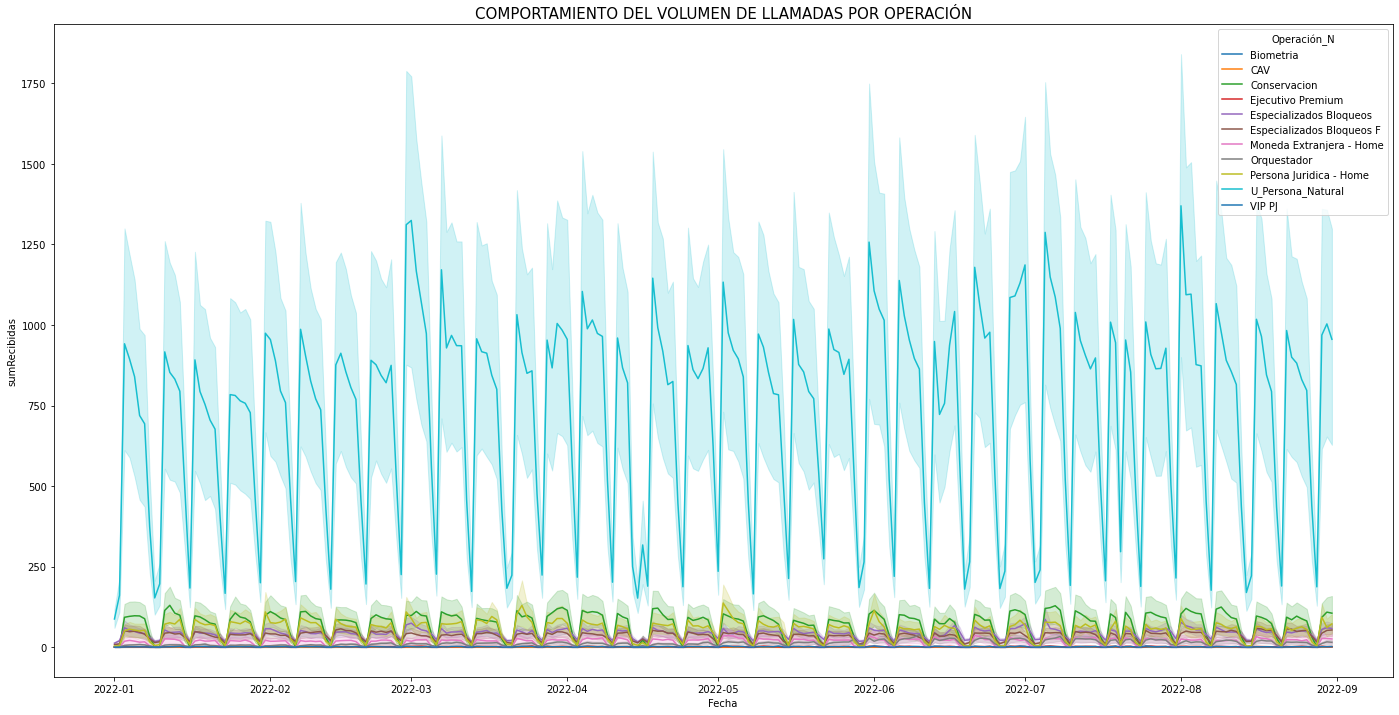

In [7]:
fig, ax = plt.subplots(figsize=(24,12))
sns.lineplot(data=df,x='Fecha' ,y="sumRecibidas", hue="Operación_N",palette="tab10"
)#, ci=None
plt.title( "COMPORTAMIENTO DEL VOLUMEN DE LLAMADAS POR OPERACIÓN",fontsize = 15)

# GRAFICOS

Text(0.5, 1.0, 'BOXPLOT POR TIPO DE OPERACIÓN')

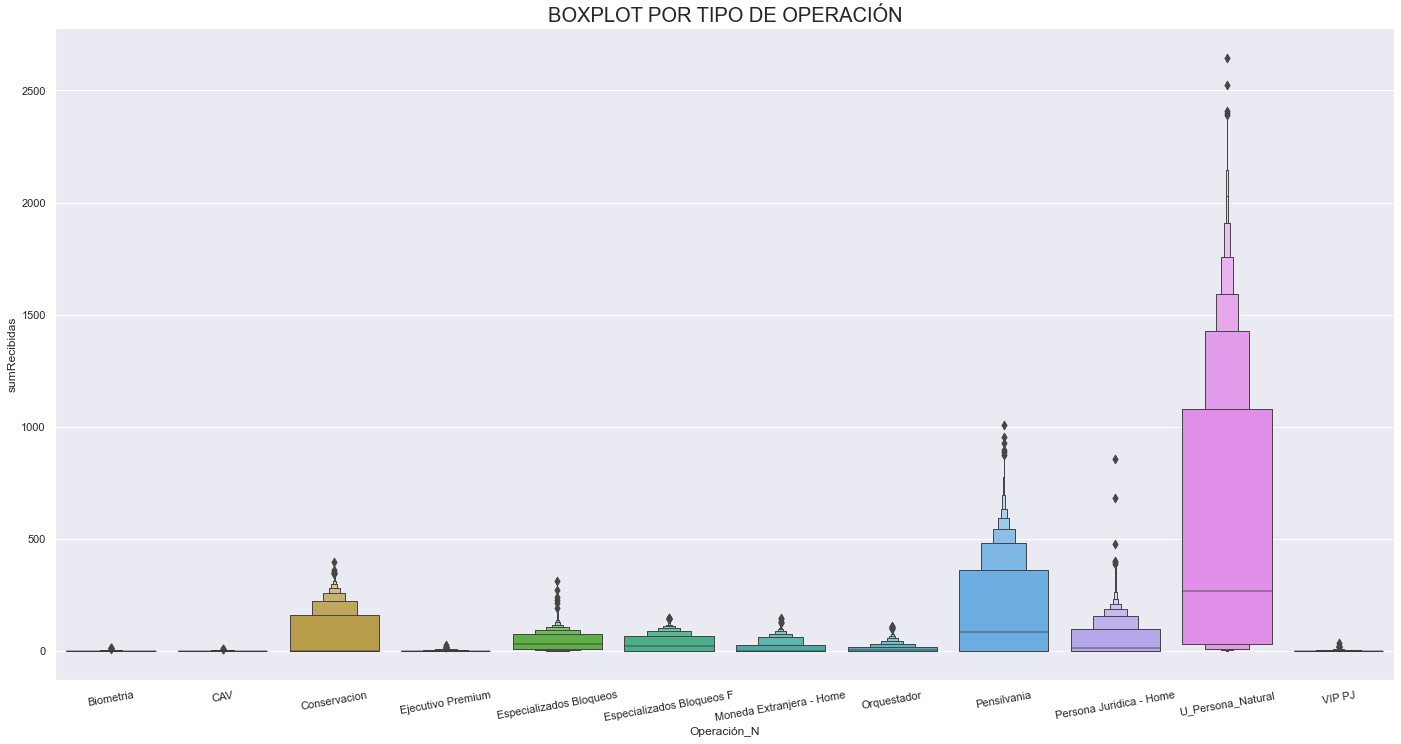

In [4]:
sns.set(rc = {'figure.figsize':(24,12)})
sns.boxenplot(data=DF, x="Operación_N", y="sumRecibidas",orient='v')
plt.xticks(rotation=10) 
plt.title("BOXPLOT POR TIPO DE OPERACIÓN",fontsize = 20)

In [ ]:
UPN.groupby(['Dia_SemN'])['sumRecibidas'].describe() 

,count,mean,std,min,25%,50%,75%,max
Dia_SemN,,,,,,,,
1,840.0,660.939286,702.658658,0.0,25.00,329.0,1386.00,2523.0
2,840.0,733.216667,680.663135,0.0,40.75,546.0,1375.00,2391.0
3,840.0,685.204762,636.152045,2.0,41.75,468.5,1307.00,2646.0
4,816.0,650.077206,601.832462,2.0,38.00,446.0,1239.25,2073.0
5,816.0,636.100490,599.471483,0.0,46.75,409.5,1217.50,2409.0
6,840.0,346.608333,345.213541,0.0,29.00,218.5,595.25,1463.0
7,840.0,140.295238,115.476598,1.0,19.00,135.0,240.00,444.0


Text(0.5, 1.0, 'BOXPLOT PERSONA NATURAL - DIA DE LA SEMANA')

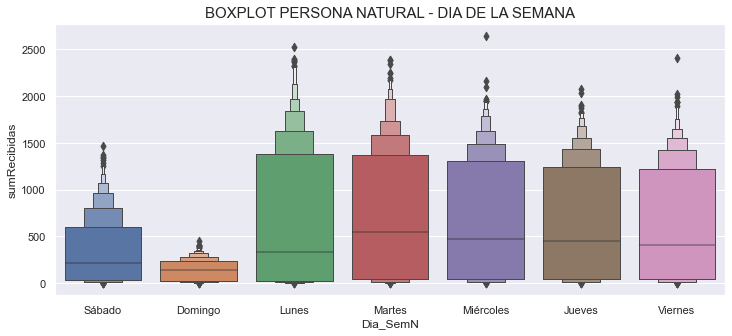

In [ ]:
UPNN=UPN.copy()
UPNN['Dia_SemN'].replace([6,7,1,2,3,4,5],['Sábado', 'Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves','Viernes'],inplace=True)
fig, ax = plt.subplots(figsize=(12,5))
sns.boxenplot(x = UPNN.Dia_SemN,
                y = UPNN.sumRecibidas, 
                ax = ax)
plt.title("BOXPLOT PERSONA NATURAL - DIA DE LA SEMANA",fontsize = 15)

Text(0.5, 1.0, 'BOXPLOT PERSONA NATURAL - MES')

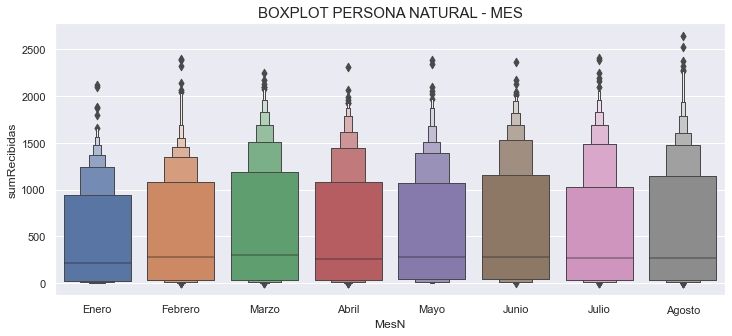

In [ ]:
UPNN['MesN'].replace([1,2,3,4,5,6,7,8],['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio','Julio','Agosto'],inplace=True)
fig, ax = plt.subplots(figsize=(12,5))
sns.boxenplot(x = UPNN.MesN,
                y = UPNN.sumRecibidas, 
                ax = ax)
plt.title("BOXPLOT PERSONA NATURAL - MES",fontsize = 15)

Text(0.5, 1.0, 'DISTRIBUCIÓN PERSONA NATURAL - COMPORTAMIENTO POR HORA ')

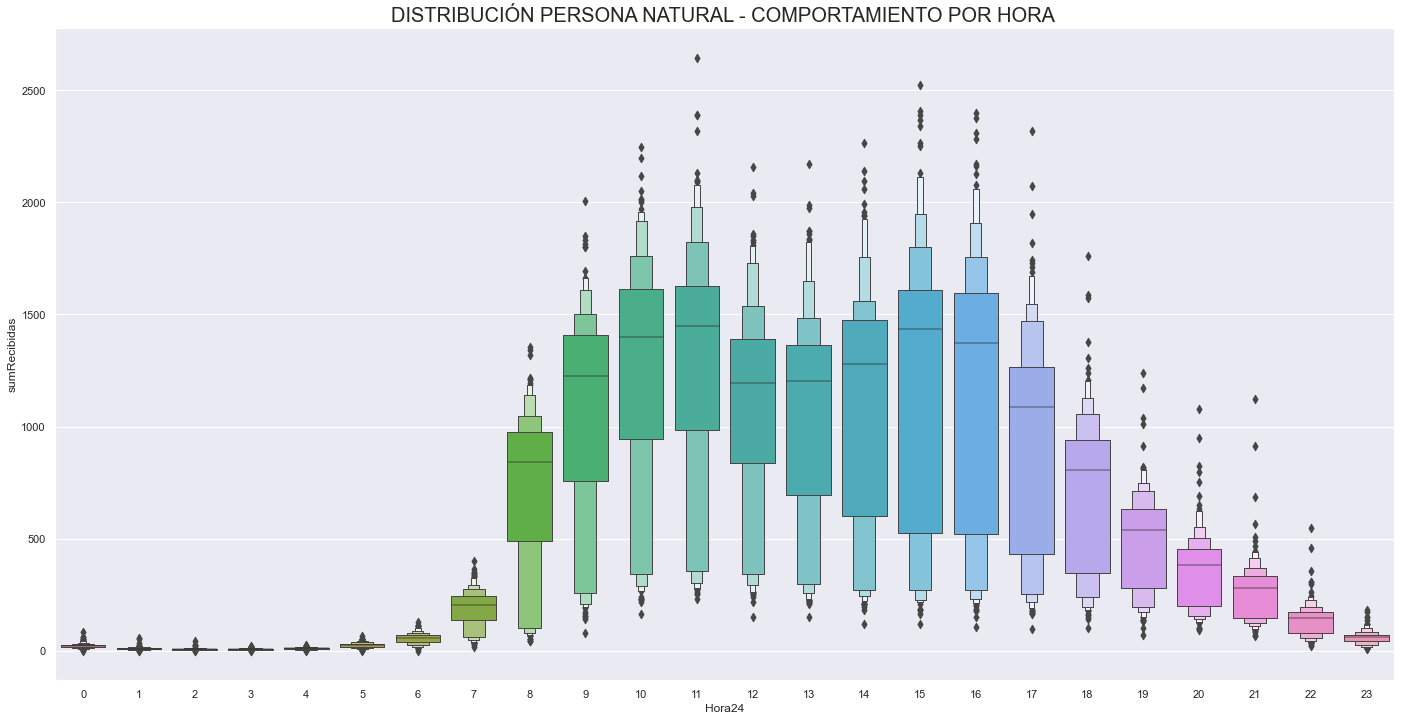

In [6]:
fig, ax = plt.subplots(figsize=(24,12))
sns.boxenplot(x = UPN.Hora24,
                y = UPN.sumRecibidas, 
                ax = ax)
plt.title( "DISTRIBUCIÓN PERSONA NATURAL - COMPORTAMIENTO POR HORA ",fontsize = 20)

Text(0.5, 1.0, 'BOXPLOT PERSONA NATURAL - DIA DEL MES')

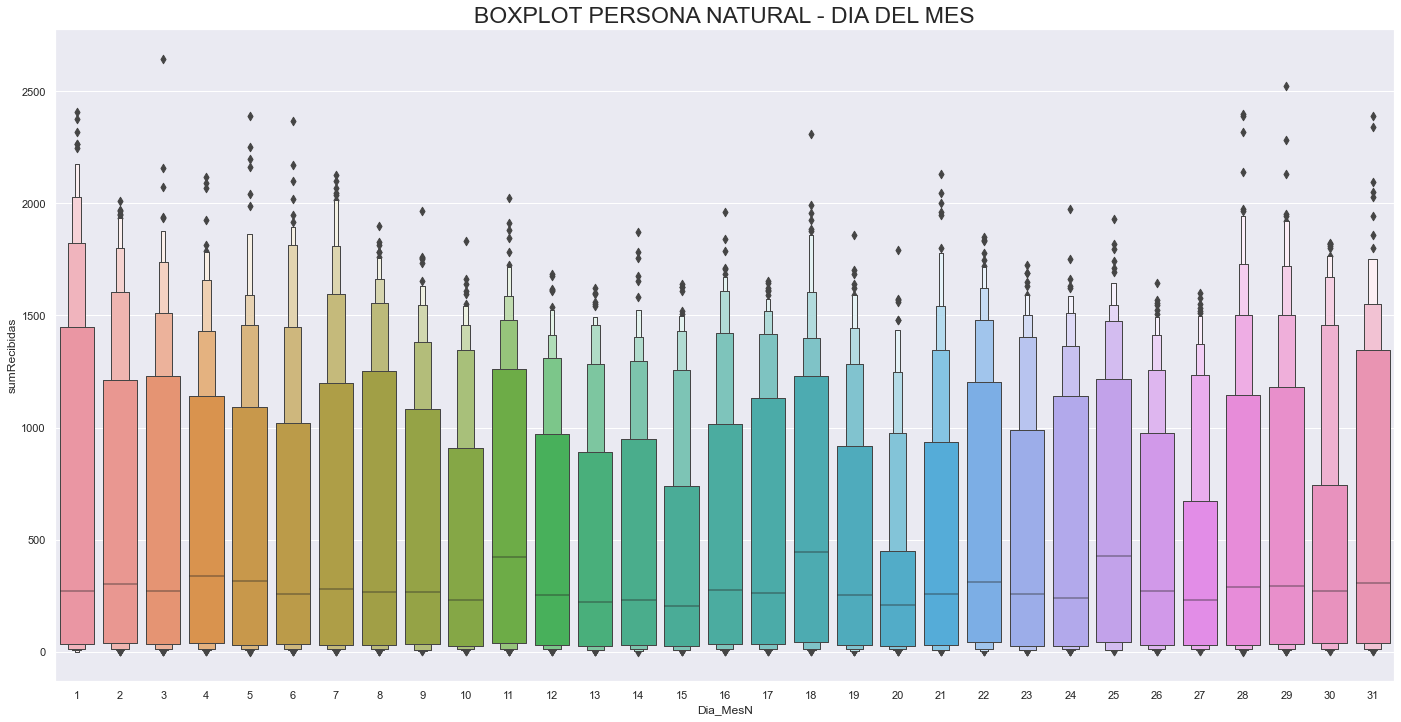

In [8]:
fig, ax = plt.subplots(figsize=(24,12))
sns.boxenplot(x = UPN.Dia_MesN,
                y = UPN.sumRecibidas, 
                ax = ax)
plt.title("BOXPLOT PERSONA NATURAL - DIA DEL MES",fontsize = 23)

In [ ]:
promdia=pd.DataFrame(UPN.groupby(['Dia_MesN'])['sumRecibidas'].mean() )
promdia.head(6)

,sumRecibidas
Dia_MesN,
1,686.307292
2,621.140625
3,594.468750
4,595.494792
5,573.546875
6,544.416667


Text(0.5, 1.0, 'BOXPLOT PERSONA NATURAL - PRESENCIA DE FESTIVOS')

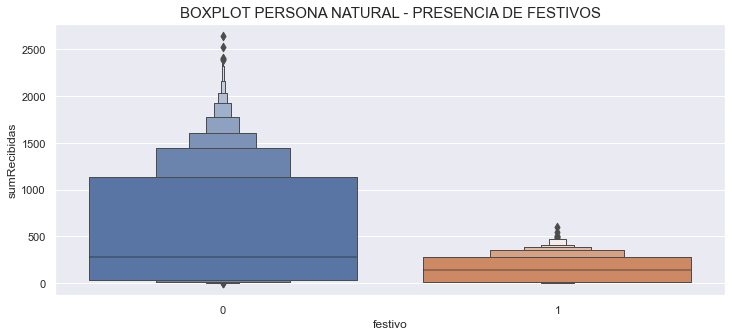

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxenplot(x = UPN.festivo,
                y = UPN.sumRecibidas, 
                ax = ax)
plt.title("BOXPLOT PERSONA NATURAL - PRESENCIA DE FESTIVOS",fontsize = 15)

Text(0.5, 1.0, 'BOXPLOT PERSONA NATURAL - PRESENCIA DE FESTIVIDADES')

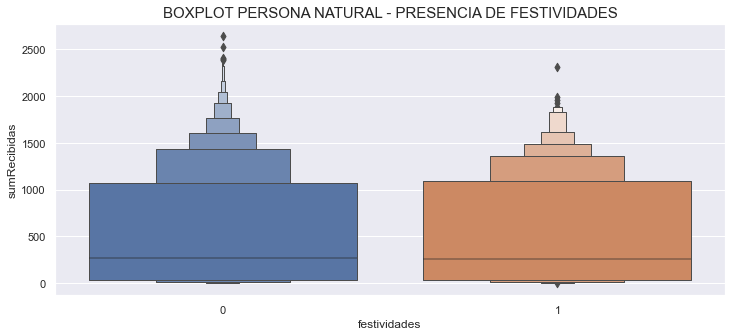

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxenplot(x = UPN.festividades,
                y = UPN.sumRecibidas, 
                ax = ax)
plt.title("BOXPLOT PERSONA NATURAL - PRESENCIA DE FESTIVIDADES",fontsize = 15)

Text(0.5, 1.0, 'PERSONA NATURAL - PRESENCIA DE FESTIVOS')

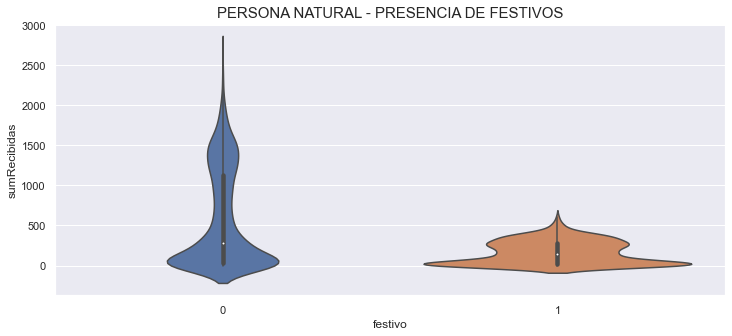

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.violinplot(x = UPN.festivo,
                y = UPN.sumRecibidas, 
                ax = ax)
plt.title( "PERSONA NATURAL - PRESENCIA DE FESTIVOS",fontsize = 15)

Text(0.5, 1.0, 'PERSONA NATURAL - PRESENCIA DE FESTIVIDADES')

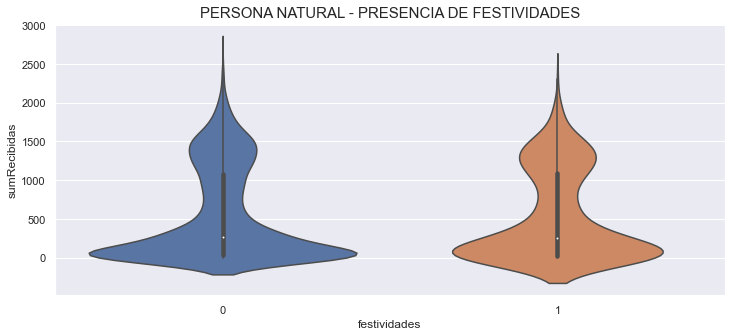

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.violinplot(x = UPN.festividades,
                y = UPN.sumRecibidas, 
                ax = ax)
plt.title( "PERSONA NATURAL - PRESENCIA DE FESTIVIDADES",fontsize = 15)

Text(0.5, 1.0, 'BOXPLOT PERSONA NATURAL - PRESENCIA DE FESTIVIDADES')

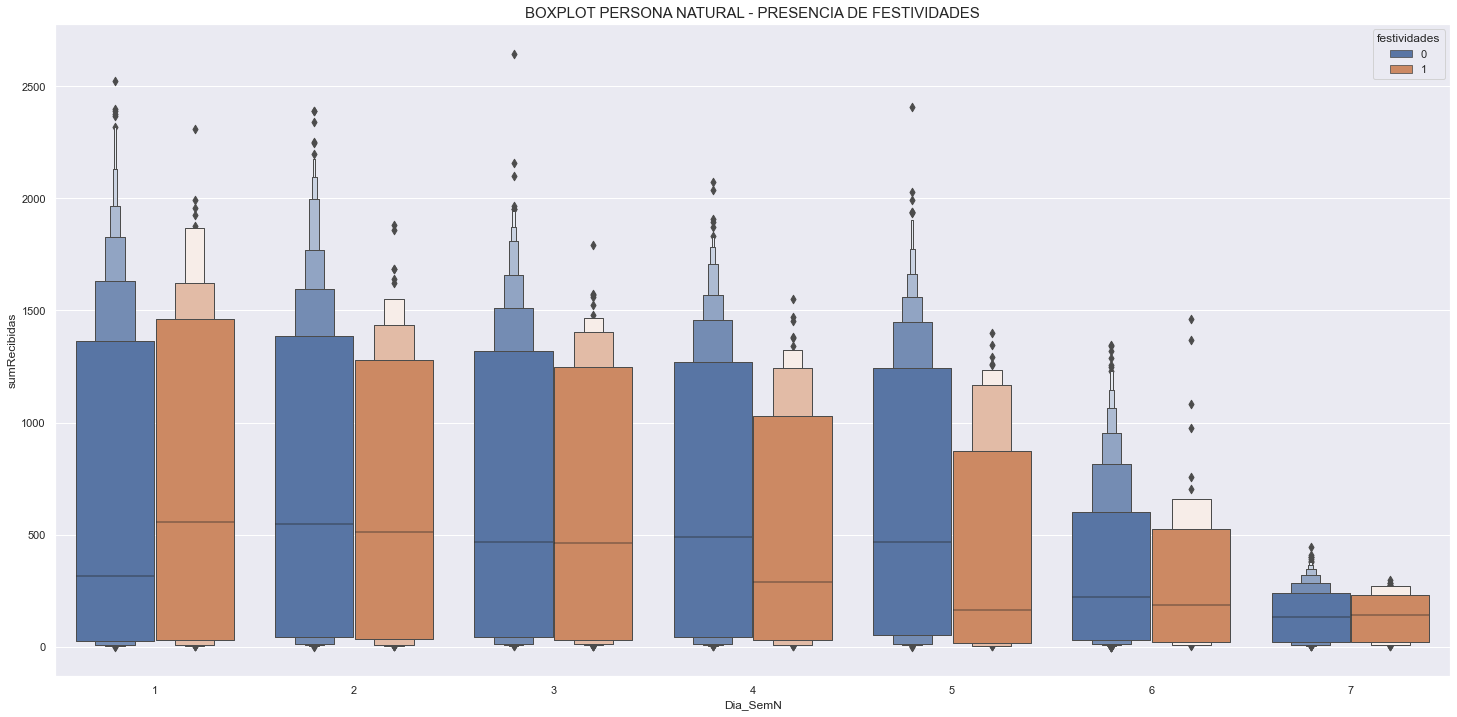

In [10]:

fig, ax = plt.subplots(figsize=(25,12))
sns.boxenplot(hue = UPN.festividades,
                y = UPN.sumRecibidas,  x=UPN.Dia_SemN,
                ax = ax)
plt.title("BOXPLOT PERSONA NATURAL - PRESENCIA DE FESTIVIDADES",fontsize = 15)

Text(0.5, 1.0, 'BOXPLOT PERSONA NATURAL - PRESENCIA DE FESTIVIDADES')

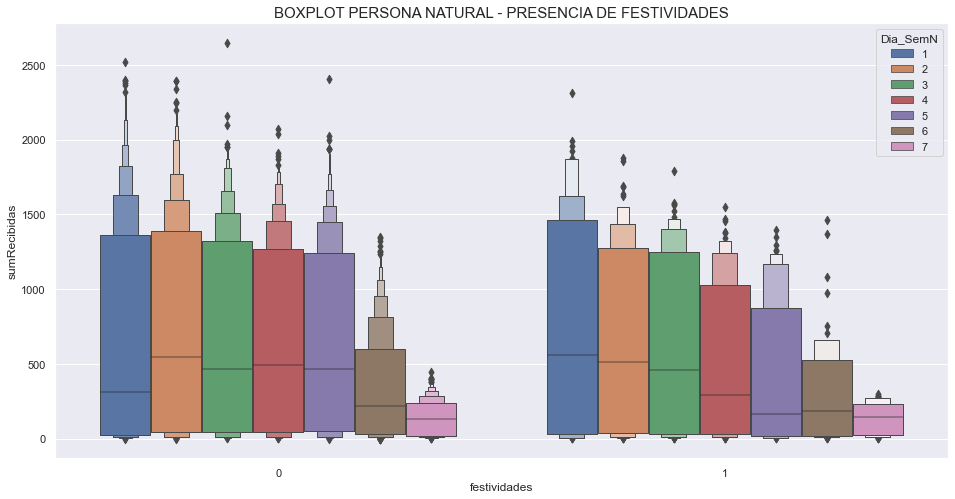

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxenplot(x = UPN.festividades,
                y = UPN.sumRecibidas,  hue=UPN.Dia_SemN,
                ax = ax)
plt.title("BOXPLOT PERSONA NATURAL - PRESENCIA DE FESTIVIDADES",fontsize = 15)

In [ ]:
promdia=pd.DataFrame(UPN.groupby(['Dia_SemN','festivo'])['sumRecibidas'].mean() )
promdia.head(6)

sumRecibidas
Dia_SemN festivo              
Domingo  0          140.072917
         1          142.666667
Jueves   0          664.136364
         1          186.125000
Lunes    0          782.227679
         1          175.785714

Text(0.5, 1.0, 'PERSONA NATURAL - COMPORTAMIENTO POR HORA - OBSERCVACIÓN DE FESTIVOS')

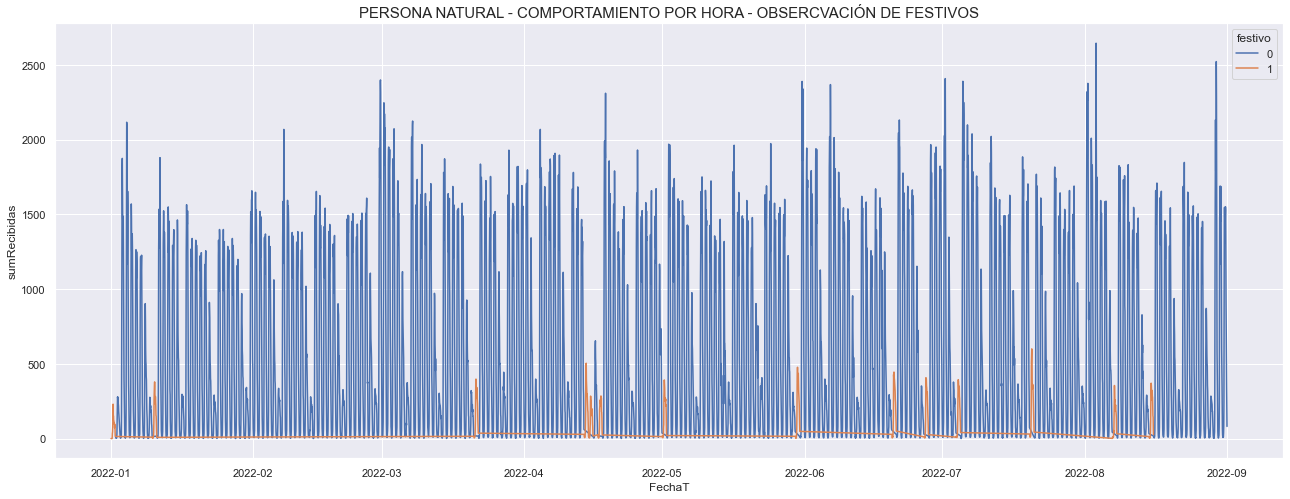

In [ ]:
sns.lineplot(data=UPN,x='FechaT' ,y="sumRecibidas", hue="festivo")
plt.title( "PERSONA NATURAL - COMPORTAMIENTO POR HORA - OBSERCVACIÓN DE FESTIVOS",fontsize = 15)

Text(0.5, 1.0, 'PERSONA NATURAL - COMPORTAMIENTO POR HORA - VOLUMEN DE LLAMADAS')

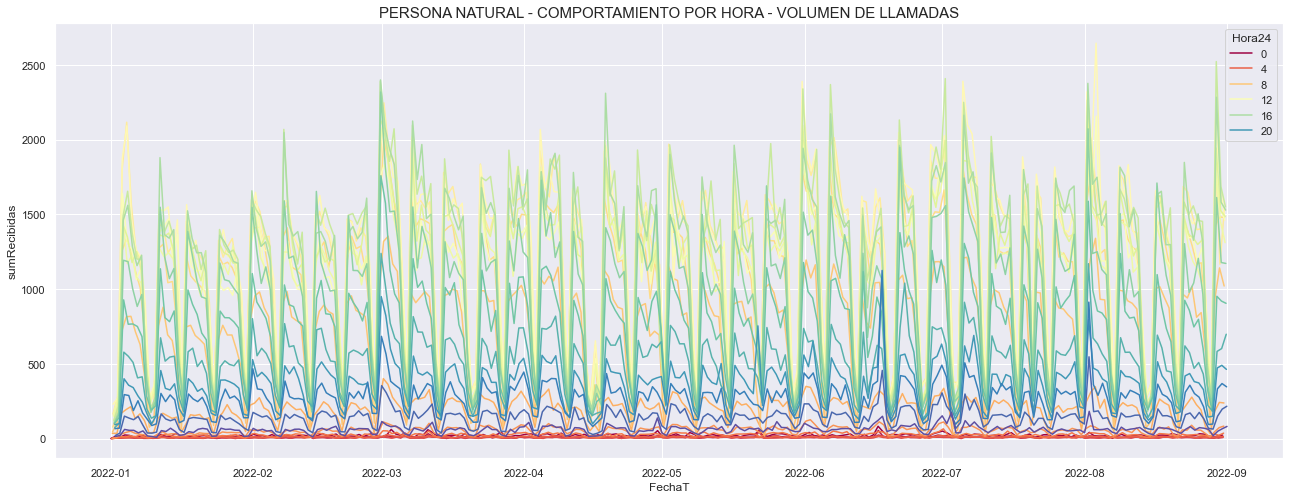

In [ ]:
sns.lineplot(data=UPN,x='FechaT' ,y="sumRecibidas", hue="Hora24",palette="Spectral")
plt.title( "PERSONA NATURAL - COMPORTAMIENTO POR HORA - VOLUMEN DE LLAMADAS",fontsize = 15)
#sns.rugplot(data=df2, x="total_bill", y="tip", hue="time")

Text(0.5, 1.0, 'PERSONA NATURAL  -  VOLUMEN DE LLAMADAS')

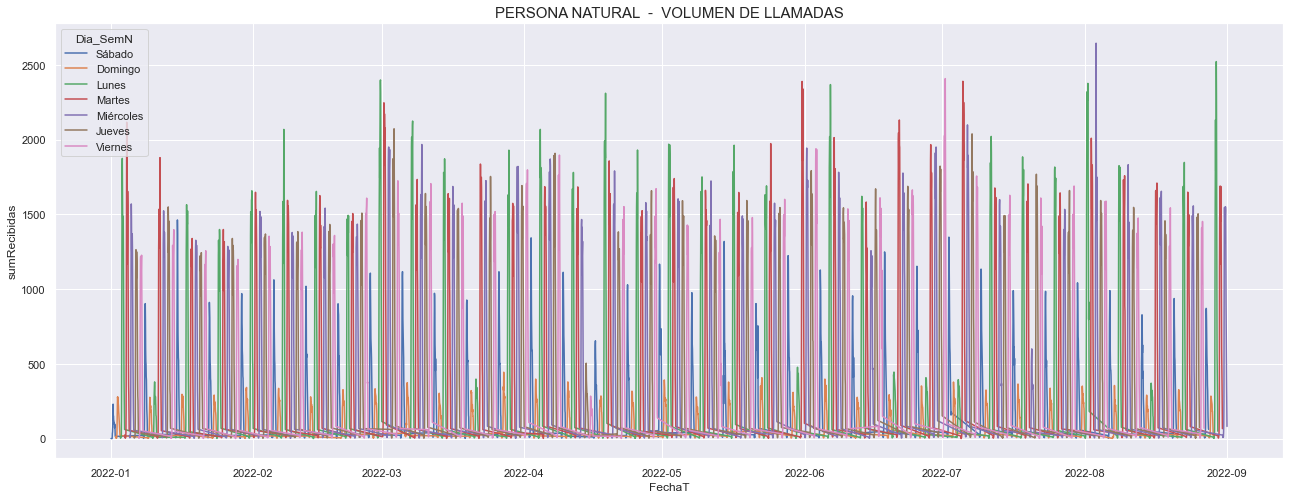

In [ ]:
sns.lineplot(data=UPN,x='FechaT' ,y="sumRecibidas", hue="Dia_SemN")
plt.title( "PERSONA NATURAL  -  VOLUMEN DE LLAMADAS",fontsize = 15)

Text(0.5, 1.0, 'DISTRIBUCIÓN - VOLUMEN DE LLAMADAS PERSONA NATURAL   ')

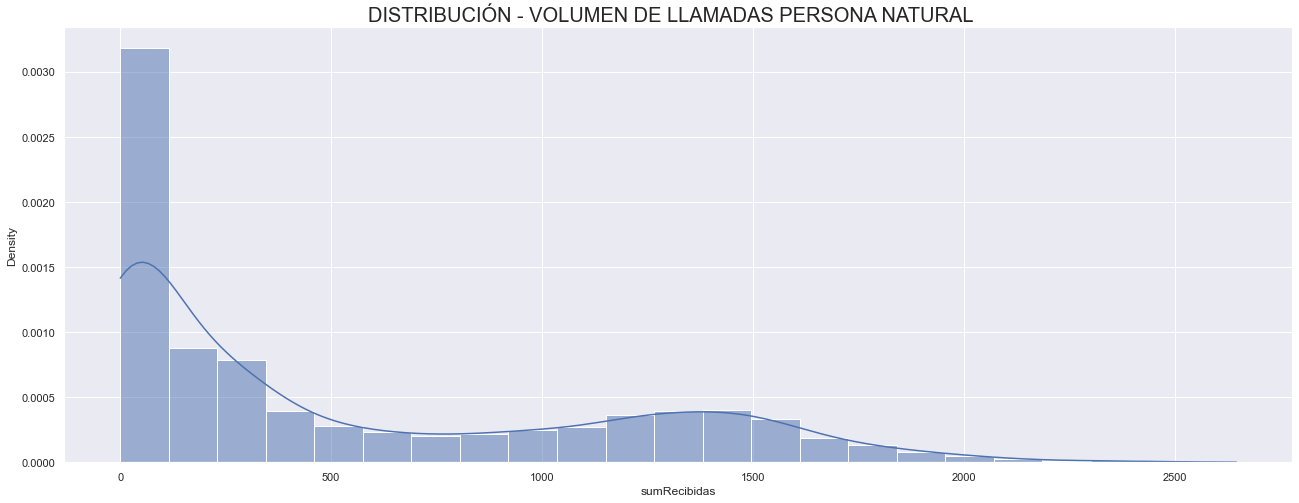

In [ ]:
sns.histplot(data=UPN, x='sumRecibidas',stat='density', kde=True)
plt.title( "DISTRIBUCIÓN - VOLUMEN DE LLAMADAS PERSONA NATURAL   " ,fontsize = 20)

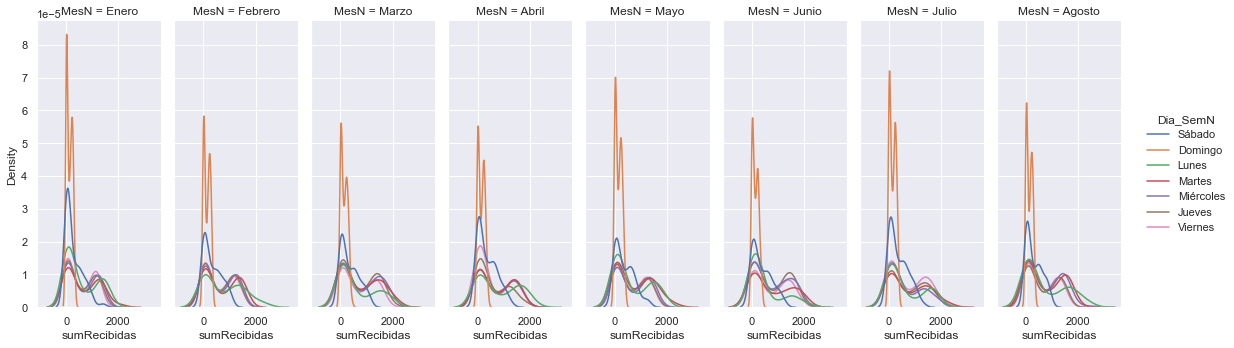

In [ ]:
sns.displot(data=UPNN, x='sumRecibidas', col="MesN", hue="Dia_SemN", kind="kde",aspect=.4)
#plt.title( "PERSONA NATURAL  -  VOLUMEN DE LLAMADAS",fontsize = 15)

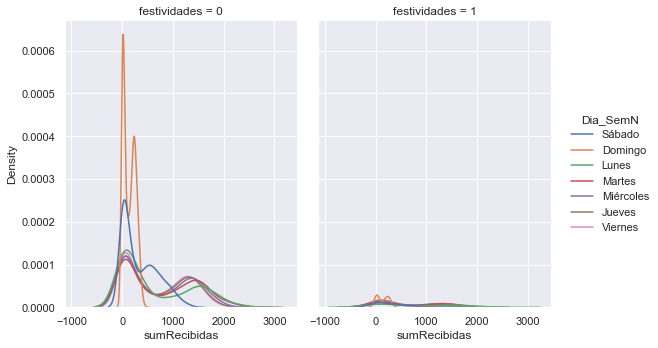

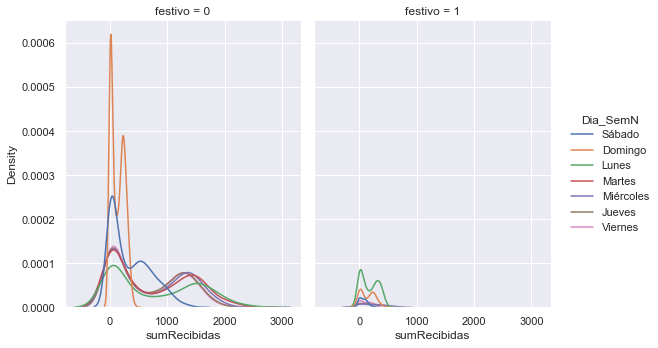

In [ ]:
sns.displot(data=UPNN, x='sumRecibidas', col="festividades", hue="Dia_SemN", kind="kde",aspect=0.8)
sns.displot(data=UPN, x='sumRecibidas', col="festivo", hue="Dia_SemN", kind="kde",aspect=0.8)

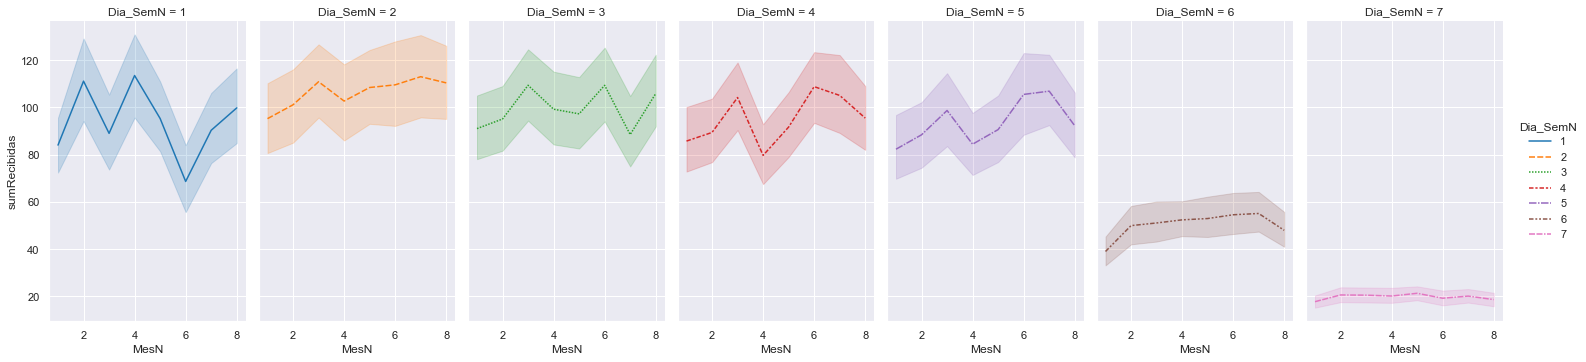

In [ ]:
sns.relplot(
    data=DF, y='sumRecibidas', x="MesN", col="Dia_SemN",palette="tab10",
    hue="Dia_SemN", style="Dia_SemN", kind="line",aspect=.6,color='red'
)

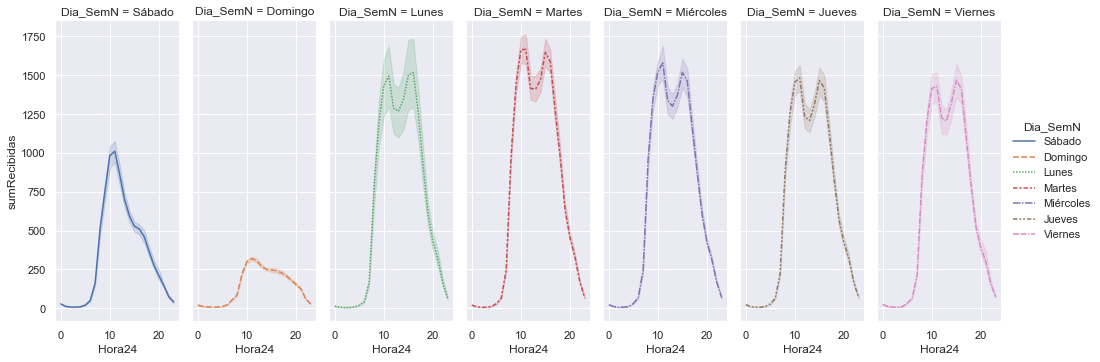

In [ ]:
sns.relplot(
    data=UPN, y='sumRecibidas', col="Dia_SemN", x="Hora24",
    hue="Dia_SemN", style="Dia_SemN", kind="line",aspect=.4
)

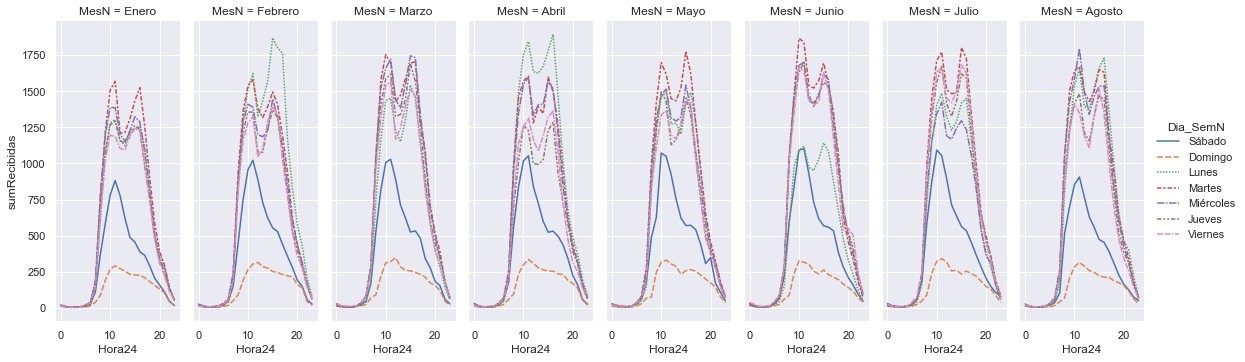

In [ ]:
sns.relplot(
    data=UPNN, y='sumRecibidas', col="MesN", x="Hora24",
    hue="Dia_SemN", style="Dia_SemN", kind="line",aspect=0.4
    ,ci=None
)
fig.savefig('temp.jpg')

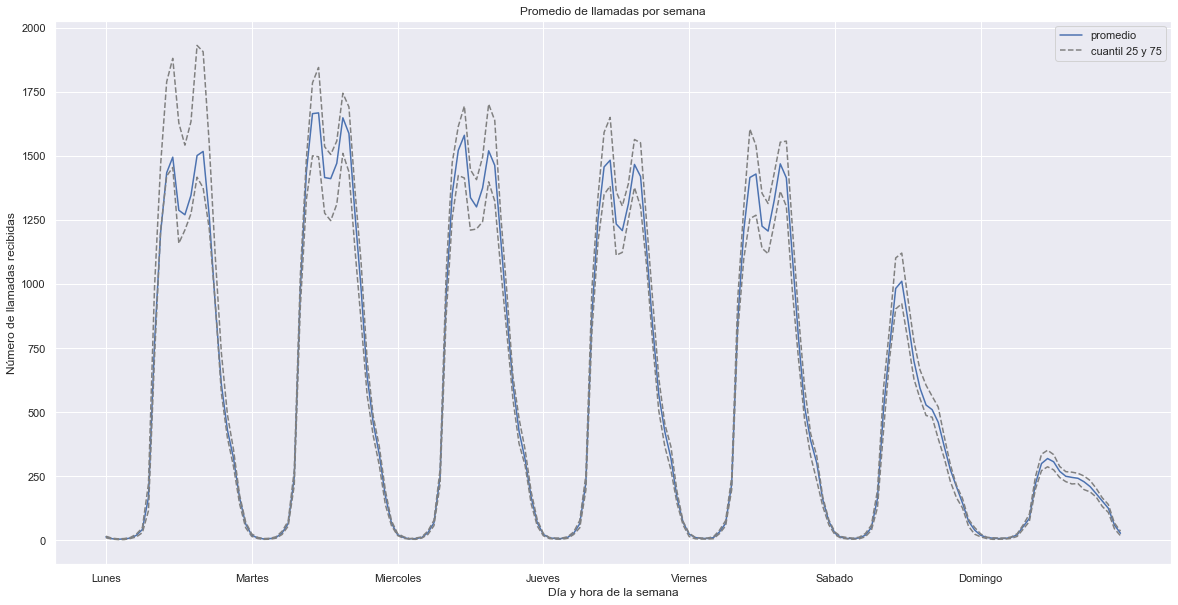

In [11]:
# Gráfico boxplot para estacionalidad diaria
# ==============================================================================
fig, ax = plt.subplots(figsize=(20, 10))
promedio_dia_hora = UPN.groupby(["Dia_SemN", "Hora24"])["sumRecibidas"].mean()
q25_dia_hora = UPN.groupby(["Dia_SemN", "Hora24"])["sumRecibidas"].quantile(0.25)
q75_dia_hora = UPN.groupby(["Dia_SemN", "Hora24"])["sumRecibidas"].quantile(0.75)

promedio_dia_hora.plot(ax=ax, label='promedio')
q25_dia_hora.plot(ax=ax, linestyle='dashed', color='gray', label='')
q75_dia_hora.plot(ax=ax, linestyle='dashed', color='gray', label='cuantil 25 y 75')


ax.set(
    title="Promedio de llamadas por semana",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"],
    xlabel="Día y hora de la semana",
    ylabel="Número de llamadas recibidas"
)

ax.legend();

# Gráfico boxplot para estacionalidad diaria

# ANALISIS SERIES TEMPORALES
# DESCOPOSICIÓN DE LA SERIE

# UPN 1 dia=24 periodos 24 horas

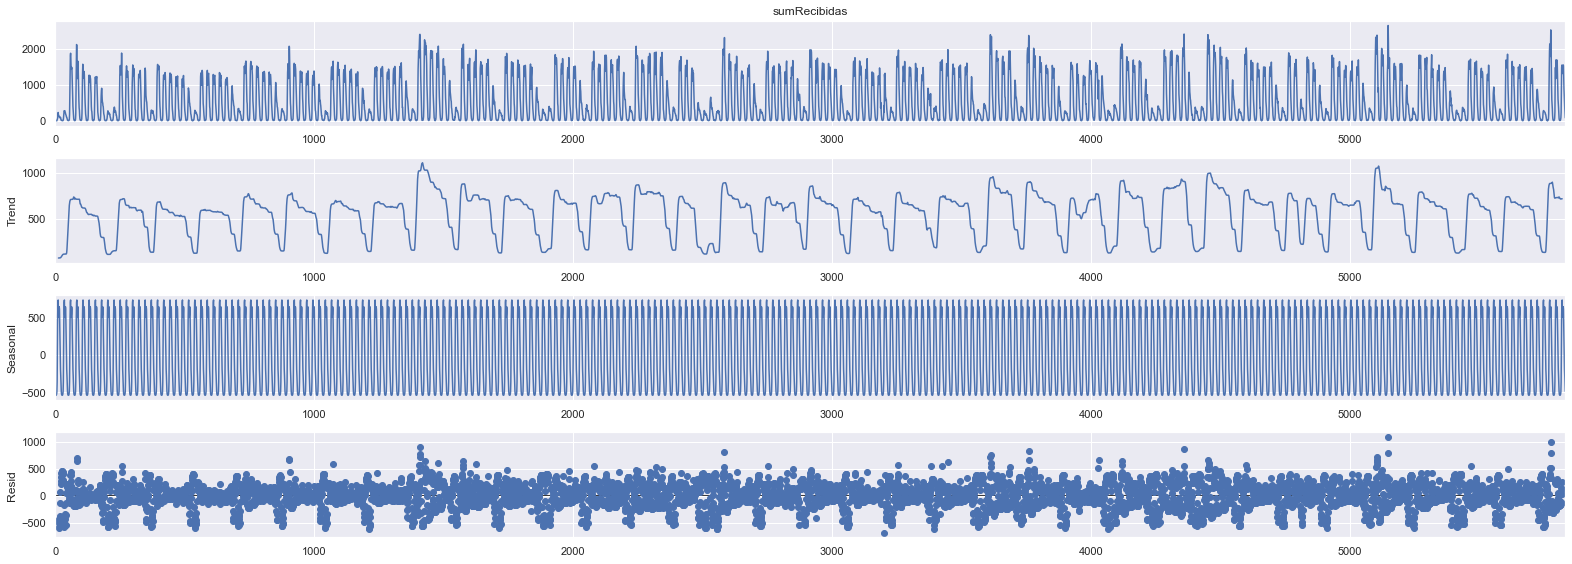

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(22,8)})

# Ejemplo de descomposición de serie de tiempo
descomposicion = sm.tsa.seasonal_decompose(UPN['sumRecibidas'],model='additive', period=24)  
fig = descomposicion.plot()




# UNICAMENTE PERSONA NATURAL
## 168 periodos total de 1 semana (24h*7 dias)

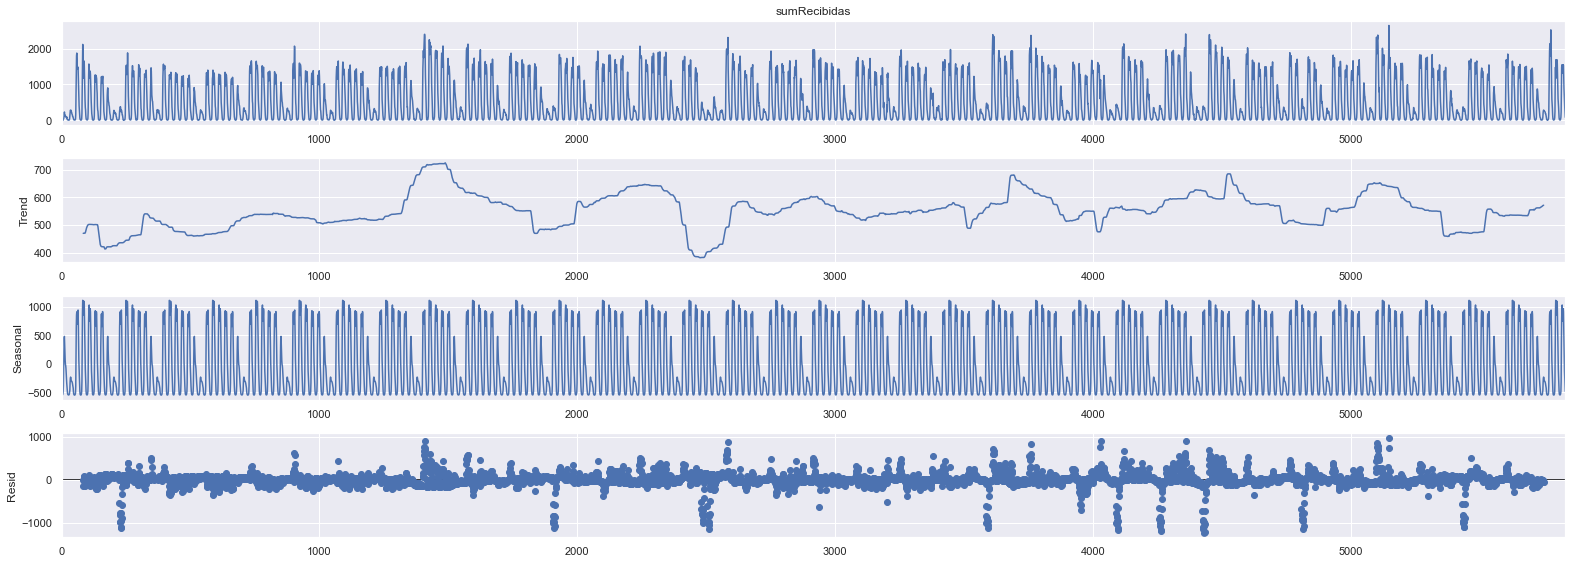

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(22,8)})
# Ejemplo de descomposición de serie de tiempo
descomposicion = sm.tsa.seasonal_decompose(UPN['sumRecibidas'],model='aditive', period=168)  
fig = descomposicion.plot()


# ACF Y PACF

## ACF SERIE TOTAL

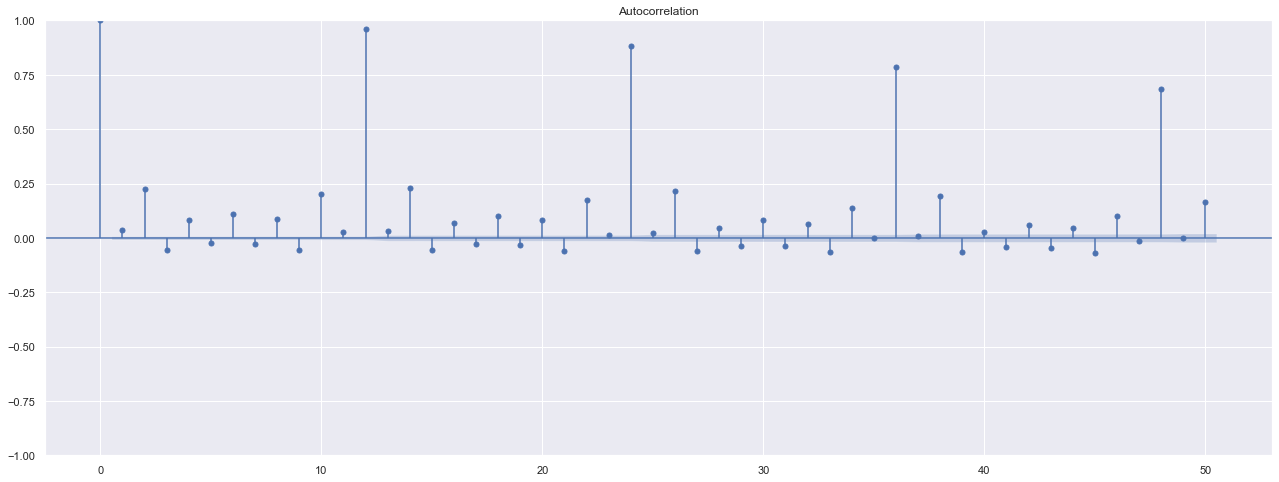

In [ ]:
sns.set(rc = {'figure.figsize':(22,8)})
# Select relevant data, index by Date
recib = df[['FechaT', 'sumRecibidas']].set_index(['FechaT'])
# Calculate the ACF (via statsmodel)
plot_acf(recib,lags=50)
# Show the data as a plot (via matplotlib)
plt.show()

# ACF UPN

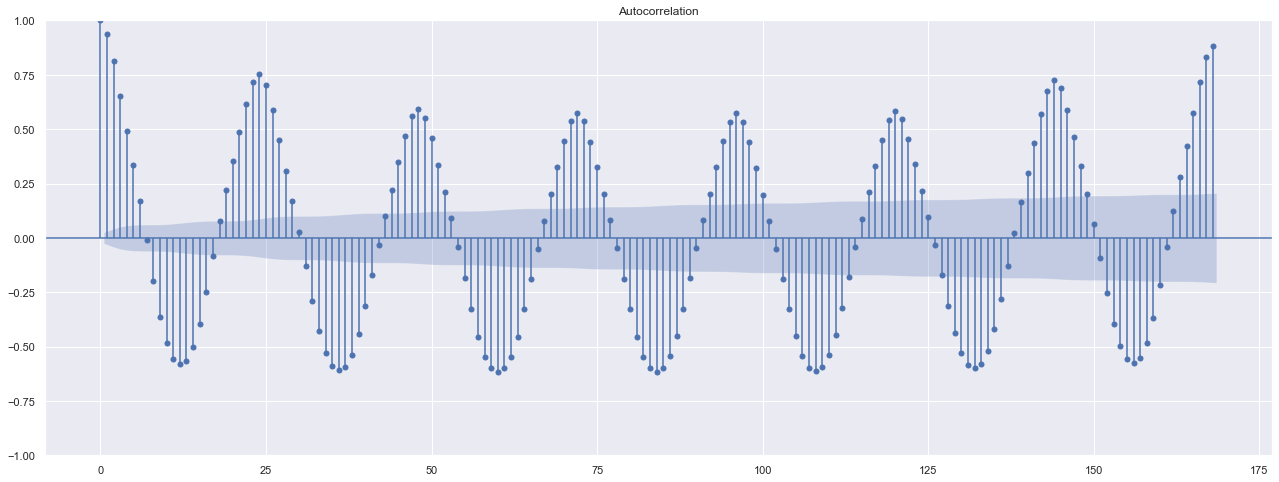

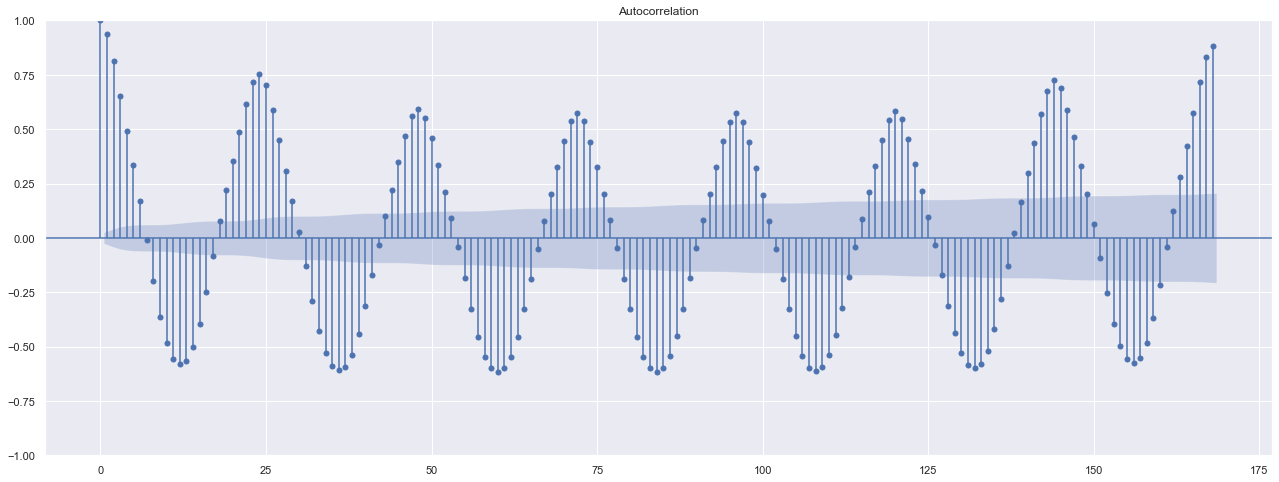

In [ ]:
sns.set(rc = {'figure.figsize':(22,8)})
sm.graphics.tsa.plot_acf(UPN['sumRecibidas'	].values.squeeze(), lags=168)

## PACF UPN

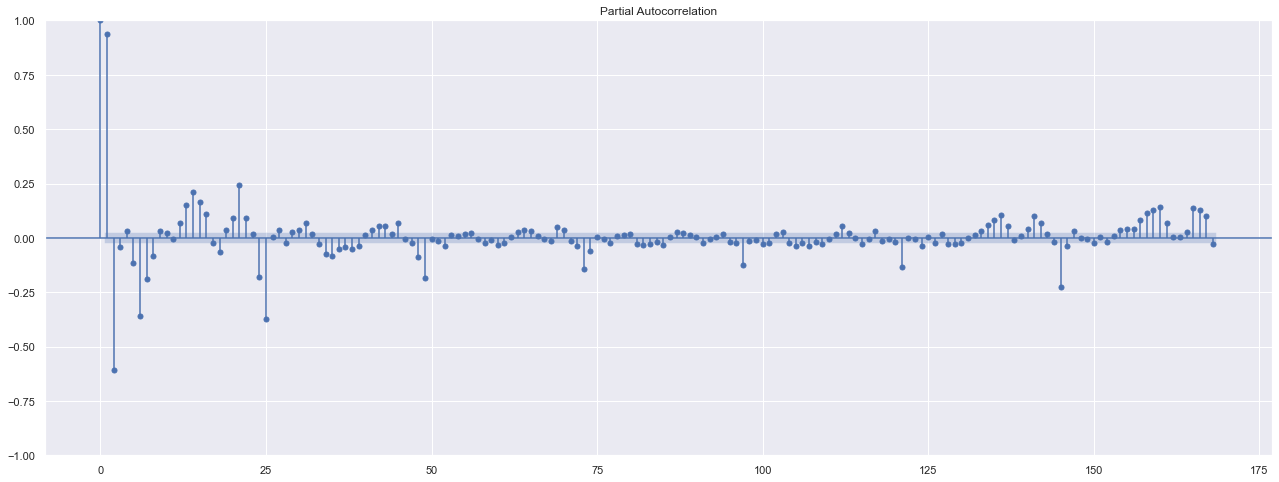

In [ ]:
sns.set(rc = {'figure.figsize':(22,8)})
sm.graphics.tsa.plot_pacf(UPN['sumRecibidas'].values.squeeze(), lags=168, method="yw",alpha=0.05)
plt.show()

# PRUEBA Dickey-Fuller
ho= no estacionariedad

segundo valor corresponde al pvalor
con pvalor menor a 0.05 se rechaza  HO.
por lo que existe suficiente evidencia estadistica para asumir que la serie es estacionaria.

## Dickey-Fuller SERIE TOTAL

In [ ]:
#perform augmented Dickey-Fuller test
adfuller(DF.sumRecibidas)

(-26.945556214036937,
 0.0,
 61,
 69921,
 {'1%': -3.4304435275537704,
  '5%': -2.8615813375175163,
  '10%': -2.5667920025482176},
 754890.6123708871)

# Dickey-Fuller UPN

In [ ]:
#perform augmented Dickey-Fuller test
adfuller(UPN.sumRecibidas)

(-11.549269207066574,
 3.4794224024168466e-21,
 34,
 5797,
 {'1%': -3.4314785489044994,
  '5%': -2.8620387116731525,
  '10%': -2.567035462232358},
 72132.69250029506)

In [12]:
69983/12

5831.916666666667